In [314]:
import pandas as pd

In [315]:
df = pd.read_csv('./data/titanic.csv')

##  1. Remove unwanted data

In [316]:
df2 = df.copy()

### df.drop
+ inplace mặc định là false:
    + True: lưu lại vào df
    + Fales: không lưu lại vào df.
+ xóa cột df.drop(columns=[list column])
+ xóa dòng df.drop(index=[])

In [317]:
df2.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.50,NaN,S
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.05,NaN,S


In [318]:
# xóa cột
df2.drop(columns=['SibSp','Parch'], inplace=True)

In [319]:
df2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S


In [320]:
# xóa dòng
df2.drop(index=[0,1,3], inplace=True)

In [321]:
df2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q


### df.remane(columns=distionry)

In [322]:
df2 = df2.rename(columns={'Name': 'PassengerName', 'SibSp':'NumberSibling'})
df2.head(2)

,PassengerId,Survived,Pclass,PassengerName,Sex,Age,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.050,NaN,S


### df.columns
+ thây đổi tên tất cả các cột
+ là một list, list số lượng giá trị phải bằng số lượng cột ở trong df

In [323]:
df2.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
df2.head(3)

,1,2,3,4,5,6,7,8,9,10
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q


##  2. Check and change datatype

In [324]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


+ Ép kiểu dữ liệu:
    + df['columns'] = df.astype('data type')
+ Ép kiểu dữ liệu datetime:
    + df['columns'] = pd.to_datetime('columns', format='')

In [325]:
df2['Survived'] = df2['Survived'].astype('float')

In [326]:
df2['PassengerId'] = df['PassengerId'].astype('str')

In [327]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 83.7+ KB


## 3. Working with Missing Values
+ Missing Values: là các giá trị bị thiếu (Null, NaN), do người dùng không điền vào, do dữ liệu bị mất trong quá trình truyền tải dữ liệu, lỗi do lập trính
+ Trong pandas, một số phương pháp loại bỏ hoặc thây thế các giá trị null
    * `isna()` or `isnull()`: lấy ra các trường bị null
    * `notna()` or `notnull()`: lấy ra các trường không bị null
    * `dropna()`: loại bỏ các trường
    * `fillna()`: thây thế giá trị các trường bằng giá trị khác

In [328]:
data = pd.DataFrame({
    'Column_1': [1, None, 2],
    'Column_2': [2, 3, 5],
    'Column_3': [None, 4, 6]
})

In [329]:
data

,Column_1,Column_2,Column_3
0,1.0,2,NaN
1,NaN,3,4.0
2,2.0,5,6.0


### df.dropna
+ axis = 0: lọc theo các ròng, xóa ròng nào có giá trị là missing value
+ axis = 1: lọc theo các cột, xóa cột nào có giá trị là missing value

In [330]:
data.dropna(axis=0)

,Column_1,Column_2,Column_3
2,2.0,5,6.0


In [331]:
data.dropna(axis=1)

,Column_2
0,2
1,3
2,5


### df.fillna

In [332]:
data.fillna(10)

,Column_1,Column_2,Column_3
0,1.0,2,10.0
1,10.0,3,4.0
2,2.0,5,6.0


Trong python
+ False: 0
+ True: 1


In [333]:
df2.isna().head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False


In [334]:
# lấy ra tổng các cột có giá trị là Null
df2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Xử lý trường Age

In [335]:
# tỷ lệ giá trị null của trường 'Age' lớn nên không được xóa.
df2['Age'].isna().sum() / df.shape[0] * 100

19.865319865319865

In [336]:
# thây các giá trị null của trường Age bằng giá trị trung bình
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

In [337]:
# kiểm tra lại
df2['Age'].isna().sum()

0

#### Xử lý trường Embarked

In [338]:
df2[df2['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [339]:
# tỷ lệ giá trị null của trường 'Embarked'
df2['Embarked'].isna().sum() / df2.shape[0] * 100

0.22446689113355783

In [351]:
# tỷ lệ giá trị null của trường 'Embarked' nhỏ nên có thể xóa được
df2 = df2[df2['Embarked'].notna()]

In [350]:
# kiểm tra lại
df2['Embarked'].isna().sum()

0

##  4. Handling duplicated data
Check các giá trị lặp đi lặp lại

In [342]:
temp = df2.sample(5)

In [343]:
df2 = pd.concat([df2, temp], axis=0, ignore_index=True)

In [344]:
# lấy ra tổng các giá trị bị duplicate
df2.duplicated().sum()

5

In [345]:
df2[df2.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,59,1.0,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
890,868,0.0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
891,190,0.0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S
892,734,0.0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
893,252,0.0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S


#### Xóa các gia trị duplicate

In [348]:
df2 = df2.drop_duplicates()

In [349]:
df2.duplicated().sum()

0

##  5. Handle mislabeled and corrupted data
+ Thống kê mô tả (Descriptive Statistics): là phương pháp để mô tả tính chất của tập dữ liệu thông qua các số liệu thống kê, đồ thị và biểu đồ
    + Central Tendency: là độ tập trung của dữ liệu, có 3 giá trị cần lư ý (mean, median, mode)
    + Dispersion: là mức dộ phân tán của các giá trị trong tập dữ liệu
+ Thống kê suy luận (Inferential Statistics)
+ Thống kê mô hình (Modeling Statistics)

<img style="background-color: #fff;"  src='https://i.imgur.com/uKuyHoV.png' width=400>

In [354]:
df['Age'] = df2['Age'].astype('int')

In [360]:
print('Fare mean: ', df['Fare'].mean())
print('Fare median: ', df['Fare'].median())
print('Fare mode: ', df['Pclass'].mode())

Fare mean:  32.204207968574636
Fare median:  14.4542
Fare mode:  0    3
Name: Pclass, dtype: int64


In [361]:
df2['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<img src="https://einstein.com.sg/wp-content/uploads/2020/08/Mean-Median-Mode-Diagrams.jpg" width="600">

**❊ SPREAD & OUTLIER DETECTION**
- interquartile range: được sử dụng để đo lường phân tán của tập dữ liệu

<img src='https://cdn.scribbr.com/wp-content/uploads/2020/09/iqr_quartiles.png'>

**Interquartiles Range**

<img style="background-color: #fff;"  src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png' width=400>


<AxesSubplot: >

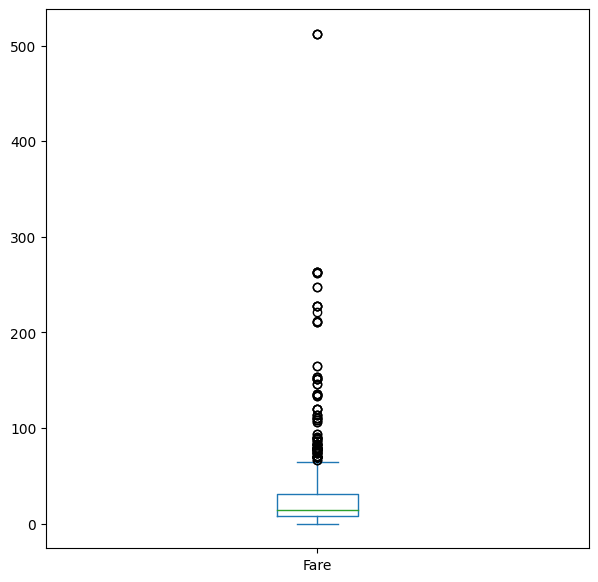

In [362]:
df2['Fare'].plot(kind='box', figsize=(7, 7))